In [1]:
for var in list(globals()):
    if var.startswith('df'):
        del globals()[var]

print("üßº ◊†◊û◊ó◊ß◊ï ◊õ◊ú ◊î◊û◊©◊™◊†◊ô◊ù ◊©◊û◊™◊ó◊ô◊ú◊ô◊ù ◊ë÷ædf")
%reset -f

üßº ◊†◊û◊ó◊ß◊ï ◊õ◊ú ◊î◊û◊©◊™◊†◊ô◊ù ◊©◊û◊™◊ó◊ô◊ú◊ô◊ù ◊ë÷ædf


#◊ë◊û◊ó◊ë◊®◊™ ◊î◊ñ◊ê◊™ ◊î◊ï◊°◊§◊™◊ô ◊î◊°◊§◊ß ◊©◊ú ◊î BESS#

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os


# ◊©◊ú◊ë ◊®◊ê◊©◊ï◊ü ◊ú◊ï◊ß◊ó◊™ 17 ◊¢◊û◊ï◊ì◊ï◊™ ◊ï◊î◊ï◊§◊õ◊™ ◊ê◊ï◊™◊ù ◊ú 76 ◊¢◊û◊ï◊ì◊ï◊™

In [3]:
# ◊ß◊ú◊ò ◊ß◊ë◊ï◊¢◊ô◊ù
site_capacity_kwp = 15200
grid_connection_limit_kw = 6000
bess_capacity_kwh =0.99* 35000
bess_charge_limit_kw = 6000
target_soc = 0.99
site_pv_limit=grid_connection_limit_kw+bess_charge_limit_kw
pv_start_hour=8
pv_end_hour=16





In [4]:
#import os

# ◊ß◊ú◊ò ◊ß◊ë◊ï◊¢◊ô◊ù
site_capacity_kwp = 15200
grid_connection_limit_kw = 6000
bess_capacity_kwh = 0.99 * 35000
bess_charge_limit_kw = 6000
target_soc = 0.99
site_pv_limit = grid_connection_limit_kw + bess_charge_limit_kw
pv_start_hour = 8
pv_end_hour = 16

# ◊ò◊¢◊ô◊†◊™ ◊î◊ß◊ï◊ë◊• ◊ê◊ï ◊ô◊¶◊ô◊®◊™ ◊†◊™◊ï◊†◊ô ◊ì◊û◊î
if os.path.exists("Project data4.xlsx"):
    df = pd.read_excel("Project data4.xlsx")
    print("‚úÖ Loaded real data.")
else:
    from generate_dummy_data_daylight_clean_10k import generate_dummy_data
    df = generate_dummy_data()
    print("‚ö†Ô∏è Using dummy data (real data file not found).")

‚ö†Ô∏è Using dummy data (real data file not found).


In [5]:
#◊°◊ô◊ì◊ï◊® ◊¢◊û◊ï◊ì◊ï◊™
#◊ê◊ô◊ô◊¶◊® 17 ◊¢◊û◊ï◊ì◊ï◊™ ◊û◊ß◊ë◊ô◊ú◊ï◊™ ◊ú◊¢◊û◊ï◊ì◊ï◊™ ◊î◊û◊ß◊ï◊® ◊©◊ë◊õ◊ú ◊ê◊ó◊™ ◊û◊î◊ù ◊û◊¶◊ï◊ô◊ô◊ü 1 ◊ê◊ï 0 ◊ê◊ù  ◊ë◊¢◊û◊ï◊ì◊™ ◊î◊û◊ß◊ï◊® ◊ô◊© ◊¢◊®◊ö ◊ó◊°◊®
for col in df.columns:
    df[f'{col}_missing'] = df[col].isna().astype(int)

#◊û◊ï◊®◊ô◊ì◊î ◊®◊ï◊ï◊ó◊ô◊ù ◊ë◊¢◊û◊ï◊ì◊ï◊™
df.columns = df.columns.str.strip()


In [6]:
#◊û◊ô◊ú◊ï◊ô◊ô ◊¢◊®◊õ◊ô◊ù ◊ó◊°◊®◊ô◊ù ◊ë◊¢◊û◊ï◊ì◊ï◊™ ◊û◊ß◊ï◊®

# ◊¢◊û◊ï◊ì◊ï◊™ ◊ú◊û◊ô◊ú◊ï◊ô ◊ë◊¢◊®◊ö ◊ß◊ë◊ï◊¢ (0)
fill_zero_columns = [
    "BESS availability",
    "Inv Block1-Availability",
    "Inv Block2-Availability",
    "Power Plant Control"
    "POC BESS-Power (BESS Meter) min"
]

# ◊¢◊û◊ï◊ì◊ï◊™ ◊ú◊ò◊ô◊§◊ï◊ú ◊ë◊ê◊ô◊†◊ò◊®◊§◊ï◊ú◊¶◊ô◊î ◊ú◊ô◊†◊ê◊®◊ô◊™
linear_interp_columns = [
    "SOC",
    "BESS Meter-Exported Energy",
    "BESS Meter-Imported Energy",
    "Grid Meter-Exported Energy",
    "Grid Meter-Imported Energy",
    "PV Meter-Exported Energy",
    "PV Meter-Imported Energy",
    "Irradiance1",
    "Irradiance2",
    "Temperature 1",
    "Temperature2"
]

# ◊ò◊ô◊§◊ï◊ú ◊ë◊¢◊®◊õ◊ô◊ù ◊ó◊°◊®◊ô◊ù ◊ú◊§◊ô ◊î◊î◊ï◊®◊ê◊ï◊™
for col in fill_zero_columns:
    if col in df.columns:
        df[col] = df[col].fillna(0)

for col in linear_interp_columns:
    if col in df.columns:
        df[col] = df[col].interpolate(method='linear', limit_direction='both')



In [7]:
# ◊ß◊®◊ô◊†◊î ◊û◊û◊ï◊¶◊¢◊™
df['irradiance_avg'] = (df['Irradiance1'] + df['Irradiance2']) / 2
df['site_power_potential'] = 15200 * (df['irradiance_avg'] / 1000)
df['surplus_power'] = (df['site_power_potential'] - 6000).clip(lower=0)
df['actual_bess_charge_power'] = df['surplus_power'].clip(upper=bess_charge_limit_kw)
df['actual_bess_charge_energy'] = df['actual_bess_charge_power'] * 0.25

#   ◊ï◊î◊ß◊®◊ô◊†◊î ◊î◊û◊û◊ï◊¶◊¢◊™ ◊ó◊ô◊©◊ï◊ë ◊î◊§◊®◊©◊ô◊ù ◊ú◊õ◊ú ◊¢◊û◊ï◊ì◊ï◊™ ◊î◊û◊ß◊ï◊®
for col in df.columns:
    if df[col].dtype in [np.float64, np.int64]:
        df[f"delta_{col}"] = df[col].diff()

 ◊©◊ú◊ë 2: ◊ë◊ì◊ô◊ß◊î ◊©◊ú ◊†◊ô◊ß◊ï◊ô ◊î◊†◊™◊ï◊†◊ô◊ù ◊ï◊î◊õ◊†◊°◊™ ◊î◊ß◊ï◊ë◊•

In [8]:
print("üîç ◊û◊ë◊†◊î ◊õ◊ú◊ú◊ô ◊©◊ú df:")
df.info()
print("\nüßæ ◊°◊ò◊ò◊ô◊°◊ò◊ô◊ß◊ï◊™ ◊õ◊ú◊ú◊ô◊ï◊™:")
print(df.describe())

# ◊°◊ô◊õ◊ï◊ù ◊¢◊®◊õ◊ô◊ù ◊ó◊°◊®◊ô◊ù
print("\nüìâ ◊õ◊û◊ï◊™ NaN ◊ë◊õ◊ú ◊¢◊û◊ï◊ì◊î:")
print(df.isna().sum().sort_values(ascending=False))

# ◊ó◊ô◊§◊ï◊© ◊¢◊®◊õ◊ô◊ù ◊ê◊ô◊†◊°◊ï◊§◊ô◊ô◊ù
print("\n‚ö†Ô∏è ◊ë◊ì◊ô◊ß◊™ ◊¢◊®◊õ◊ô inf ◊ê◊ï -inf:")
print(np.isinf(df.select_dtypes(include=[np.number])).sum())

# ◊ë◊ì◊ô◊ß◊™ ◊¢◊û◊ï◊ì◊ï◊™ ◊õ◊§◊ï◊ú◊ï◊™
print("\nüß© ◊ë◊ì◊ô◊ß◊™ ◊¢◊û◊ï◊ì◊ï◊™ ◊õ◊§◊ï◊ú◊ï◊™:")
duplicated_cols = df.columns[df.T.duplicated()]
print(duplicated_cols)

üîç ◊û◊ë◊†◊î ◊õ◊ú◊ú◊ô ◊©◊ú df:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 77 columns):
 #   Column                                         Non-Null Count  Dtype         
---  ------                                         --------------  -----         
 0   Date                                           10000 non-null  datetime64[ns]
 1   SOC                                            10000 non-null  float64       
 2   BESS availability                              10000 non-null  float64       
 3   Inv Block1-Availability                        10000 non-null  float64       
 4   Inv Block2-Availability                        10000 non-null  float64       
 5   BESS Meter-Exported Energy                     10000 non-null  float64       
 6   BESS Meter-Imported Energy                     10000 non-null  float64       
 7   Grid Meter-Exported Energy                     10000 non-null  float64       
 8   Grid Meter-Imported Energ

In [9]:
#df = df.dropna()
# ◊°◊ô◊†◊ï◊ü ◊î◊¢◊û◊ï◊ì◊ï◊™ ◊©◊®◊ï◊¶◊ô◊ù ◊ú◊î◊°◊ô◊®
cols_to_drop = [col for col in df.columns if col.startswith('delta_') and col.endswith('_missing')]

# ◊î◊°◊®◊™ ◊î◊¢◊û◊ï◊ì◊ï◊™
df = df.drop(columns=cols_to_drop)

print(f"◊î◊ï◊°◊®◊ï {len(cols_to_drop)} ◊¢◊û◊ï◊ì◊ï◊™: {cols_to_drop}")

binary_cols = ['is_weekend', 'suspected_blackout', 'is_peak_time', 'bess_is_full', 'valid_for_PR']
existing_cols = [col for col in binary_cols if col in df.columns]
df[existing_cols] = df[existing_cols].apply(pd.to_numeric, errors='coerce')

◊î◊ï◊°◊®◊ï 17 ◊¢◊û◊ï◊ì◊ï◊™: ['delta_Date_missing', 'delta_SOC_missing', 'delta_BESS availability_missing', 'delta_Inv Block1-Availability_missing', 'delta_Inv Block2-Availability_missing', 'delta_BESS Meter-Exported Energy_missing', 'delta_BESS Meter-Imported Energy_missing', 'delta_Grid Meter-Exported Energy_missing', 'delta_Grid Meter-Imported Energy_missing', 'delta_PV Meter-Exported Energy_missing', 'delta_PV Meter-Imported Energy_missing', 'delta_Power Plant Control_missing', 'delta_Irradiance1_missing', 'delta_Temperature 1_missing', 'delta_Irradiance2_missing', 'delta_Temperature2_missing', 'delta_POC BESS-Power (BESS Meter) min_missing']


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 60 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   Date                                     10000 non-null  datetime64[ns]
 1   SOC                                      10000 non-null  float64       
 2   BESS availability                        10000 non-null  float64       
 3   Inv Block1-Availability                  10000 non-null  float64       
 4   Inv Block2-Availability                  10000 non-null  float64       
 5   BESS Meter-Exported Energy               10000 non-null  float64       
 6   BESS Meter-Imported Energy               10000 non-null  float64       
 7   Grid Meter-Exported Energy               10000 non-null  float64       
 8   Grid Meter-Imported Energy               10000 non-null  float64       
 9   PV Meter-Exported Energy                

In [11]:
df.shape[1]

60

In [12]:

#  ◊ï◊î◊ï◊°◊§◊™ ◊¢◊û◊ï◊ì◊ï◊™

df['datetime'] = pd.to_datetime(df['Date'])
df['hour'] = df['datetime'].dt.hour + df['datetime'].dt.minute / 60
df['date'] = df['datetime'].dt.date

df['minute'] = df['Date'].dt.minute
df['dayofweek'] = df['Date'].dt.dayofweek
df['is_weekend'] = df['dayofweek'] >= 5
df['month'] = df['Date'].dt.month
df['abs_POC_BESS_Power'] = df['POC BESS-Power (BESS Meter) min'].abs()


# ◊î◊™◊ô◊ó◊°◊ï◊™ ◊ú◊ñ◊û◊ô◊†◊ï◊ô◊ï◊™
df['bess_available'] = (df['BESS availability'] == 100).astype(int)
df['pv_available'] = ((df['Inv Block1-Availability'] == 100) &
                      (df['Inv Block2-Availability'] == 100)).astype(int)
# ◊©◊ú◊ë 1: ◊ó◊ô◊©◊ï◊ë ◊®◊ê◊©◊ï◊†◊ô ◊©◊ú grid ratio
df['grid_ratio'] = df['Power Plant Control'] / grid_connection_limit_kw

# ◊©◊ú◊ë 2: ◊™◊†◊ê◊ô ◊ú◊ó◊©◊ì ◊ú◊î◊§◊°◊ß◊™ ◊ó◊©◊û◊ú
# ◊†◊†◊ô◊ó ◊©-pv_energy ◊î◊ï◊ê ◊¢◊û◊ï◊ì◊î ◊ß◊ô◊ô◊û◊™ (◊ú◊û◊©◊ú PV Meter-Exported Energy)
df['suspected_blackout'] = (
    df['bess_available'].isna() &
    df['pv_available'].isna() &
    df['irradiance_avg'].isna() &
    (df['PV Meter-Exported Energy'] == 0)
)

# ◊©◊ú◊ë 3: ◊ß◊ë◊ô◊¢◊™ ◊ñ◊û◊ô◊†◊ï◊™ ◊®◊©◊™ ◊ú◊§◊ô ◊™◊†◊ê◊ô◊ù
df['grid_available'] = (
    ((df['grid_ratio'] < 1) | df['suspected_blackout'])
).astype(int)



In [13]:
##test1
# ◊©◊ú◊ë 4: ◊ó◊ô◊©◊ï◊ë ◊©◊¢◊™ ◊§◊°◊í◊î ◊ú◊§◊ô ◊ò◊ë◊ú◊™ ◊ß◊ë◊ï◊¢◊ô◊ù
peak_config = {
    1: (17, 22), 2: (17, 22), 3: (17, 22), 4: (17, 22), 5: (17, 22),
    6: (17, 23), 7: (17, 23), 8: (17, 23), 9: (17, 23),
    10: (17, 22), 11: (17, 22), 12: (17, 22)
}
df['is_peak_time'] = df.apply(lambda row: peak_config[row['month']][0] <= row['hour'] < peak_config[row['month']][1], axis=1)

def get_operation_zone(row):
    if  6 <= row['hour'] <= 16:
        return 'PV_active'
    elif row['is_peak_time']:
        return 'Discharge_peak'
    else:
        return 'Free_night'

df['operation_zone'] = df.apply(get_operation_zone, axis=1)

# ◊©◊ú◊ë 6: ◊ó◊ô◊©◊ï◊ë ◊î◊§◊®◊©◊ô◊ù ◊ú◊õ◊ú ◊¢◊û◊ï◊ì◊ï◊™ ◊î◊û◊ß◊ï◊®
#for col in df.columns:
    #if df[col].dtype in [np.float64, np.int64]:
      #  df[f"delta_{col}"] = df[col].diff()
#◊û◊¢◊õ◊©◊ô◊ï ◊†◊™◊¢◊ú◊ù ◊õ◊ú ◊ô◊ï◊ù ◊û◊î◊©◊¢◊î 00:15
mask = df['Date'].dt.time != pd.to_datetime("00:15").time()
df_filtered = df[mask]




In [14]:
# ◊©◊ú◊ë 5: ◊ó◊ô◊©◊ï◊ë◊ô◊ù ◊†◊ï◊°◊§◊ô◊ù





# ---------- ◊©◊ú◊ë ◊ë': ◊ó◊ô◊©◊ï◊ë◊ô ◊§◊ô◊¶'◊®◊ô◊ù ---------- #

# ◊ë◊ì◊ô◊ß◊™ ◊î◊ê◊ù ◊î◊°◊ï◊ú◊ú◊î ◊û◊ú◊ê◊î
df['bess_is_full'] = df['SOC'] >= 0.96

# ◊î◊ê◊ù ◊®◊ë◊¢ ◊î◊©◊¢◊î ◊™◊ß◊§◊î ◊ú◊ó◊ô◊©◊ï◊ë PR (◊ú◊ê ◊õ◊©◊ê◊ô◊ü ◊ñ◊û◊ô◊†◊ï◊™ ◊ê◊ï ◊©◊î◊°◊ï◊ú◊ú◊î ◊û◊ú◊ê◊î)
df['valid_for_PR'] = (
    df['bess_available']
    & df['grid_available']
    & (~df['bess_is_full'])
)

# ◊î◊í◊ë◊ú◊™ ◊î◊î◊°◊§◊ß ◊î◊§◊ï◊ò◊†◊¶◊ô◊ê◊ú◊ô ◊ú◊û◊ß◊°◊ô◊û◊ï◊ù ◊î◊û◊ï◊™◊®
df['target'] = df['site_power_potential'].clip(upper=site_pv_limit)

# ◊ô◊ó◊° ◊ë◊ô◊ü ◊ô◊ô◊¶◊ï◊® ◊ë◊§◊ï◊¢◊ú ◊ú◊û◊ß◊°◊ô◊û◊ï◊ù ◊ê◊§◊©◊®◊ô ‚Äì Target Rate
df['target_rate'] = df['delta_PV Meter-Exported Energy'] / df['target']

# ◊ó◊ô◊©◊ï◊ë PR ◊ú◊§◊ô ◊ß◊®◊ô◊†◊î ◊ï◊î◊°◊§◊ß ◊û◊ï◊™◊ß◊ü
df['PR'] = (
    df['delta_PV Meter-Exported Energy']
    / ((df['irradiance_avg'] / 4000) * site_capacity_kwp)
)
df['target_rate'] = np.nan_to_num(df['target_rate'], nan=0.0, posinf=0.0, neginf=0.0)
df['PR'] = np.nan_to_num(df['target_rate'], nan=0.0, posinf=0.0, neginf=0.0)


# ◊ê◊ô◊†◊ì◊ô◊ß◊¶◊ô◊î ◊ú◊û◊ô ◊ß◊ô◊ë◊ú ◊¢◊ì◊ô◊§◊ï◊™ ◊ß◊ï◊ì◊ù: ◊í◊®◊ô◊ì ◊ê◊ï ◊°◊ï◊ú◊ú◊î
df['first_grid_act'] = (
    df['delta_Grid Meter-Exported Energy'] > df['delta_BESS Meter-Imported Energy']
).astype(int)

df['first_bess_act'] = (
    df['delta_Grid Meter-Exported Energy'] < df['delta_BESS Meter-Imported Energy']
).astype(int)

In [15]:
# ◊©◊ú◊ë 6: ◊ó◊ô◊©◊ï◊ë◊ô◊ù ◊†◊ï◊°◊§◊ô◊ù
df['first_grid_act'] = (df['delta_Grid Meter-Exported Energy'] > df['delta_BESS Meter-Imported Energy']).astype(int)
df['first_bess_act'] = (df['delta_Grid Meter-Exported Energy'] < df['delta_BESS Meter-Imported Energy']).astype(int)




In [16]:


    # ◊ó◊ô◊©◊ï◊ë ◊û◊¶◊ë ◊†◊ï◊õ◊ó◊ô ◊ë◊°◊ï◊ú◊ú◊î ◊ï◊ê◊†◊®◊í◊ô◊î ◊†◊ì◊®◊©◊™
    df['energy_in_bess_kwh'] = df['SOC'] * bess_capacity_kwh
    df['energy_needed_kwh'] = (target_soc * bess_capacity_kwh) - df['energy_in_bess_kwh']

    # ◊ó◊ô◊©◊ï◊ë ◊õ◊û◊ï◊™ ◊ì◊ß◊ï◊™ ◊†◊ï◊™◊®◊ï◊™ ◊¢◊ì 16:30
    CHARGE_END_MINUTES = 16 * 60 + 30
    df['time_in_minutes'] = df['datetime'].dt.hour * 60 + df['datetime'].dt.minute
    df['quarters_left'] = ((CHARGE_END_MINUTES - df['time_in_minutes']) / 15).clip(lower=0).astype(int)

    df.loc[0] = df.loc[0].replace([np.inf, -np.inf], np.nan).fillna(0)

In [17]:
# ◊î◊í◊†◊î ◊¢◊ú denominator
df = df.copy()

# ◊ò◊ô◊§◊ï◊ú ◊ë◊û◊õ◊†◊î: ◊ê◊ù ◊î◊ï◊ê 0, ◊†◊ó◊ú◊ô◊£ ◊ë÷æNaN ◊õ◊ì◊ô ◊ú◊î◊ô◊û◊†◊¢ ◊û◊ó◊ú◊ï◊ß◊î ◊ë◊ê◊§◊°
df['energy_needed_kwh'] = df['energy_needed_kwh'].fillna(0)

# ◊ó◊ô◊©◊ï◊ë ◊õ◊û◊ï◊™ ◊®◊ë◊¢◊ô ◊î◊©◊¢◊î ◊î◊ì◊®◊ï◊©◊ô◊ù ◊ú◊ò◊¢◊ô◊†◊î ◊û◊ú◊ê◊î ◊©◊ú ◊î◊°◊ï◊ú◊ú◊î
#df['required_quarters'] = df['energy_needed_kwh'] / df['delta_BESS Meter-Imported Energy']
#df['required_quarters'] = (df['energy_needed_kwh'] /
                    #       df['abs_POC_BESS_Power'].where(df['abs_POC_BESS_Power'] > 0, 1)) * 4

df['required_quarters'] = (df['energy_needed_kwh'] /
                           df['abs_POC_BESS_Power'].mask(df['abs_POC_BESS_Power'] < 1, 1)) * 4

#df['required_quarters'] = df['required_quarters'].replace([np.inf, -np.inf], np.nan).fillna(0)

# ◊ó◊ô◊©◊ï◊ë ◊¢◊ì◊ô◊§◊ï◊™ ◊ú◊°◊ï◊ú◊ú◊î: ◊î◊ê◊ù ◊ô◊© ◊û◊°◊§◊ô◊ß ◊ñ◊û◊ü ◊¢◊ì ◊°◊ï◊£ ◊î◊ô◊ï◊ù ◊õ◊ì◊ô ◊ú◊ò◊¢◊ï◊ü ◊ê◊™ ◊î◊°◊ï◊ú◊ú◊î
df['BESS First'] = (df['required_quarters'] > df['quarters_left']).astype(int)

# ◊®◊ß ◊ú◊©◊ï◊®◊î ◊î◊®◊ê◊©◊ï◊†◊î: ◊û◊ô◊ú◊ï◊ô ◊¢◊®◊õ◊ô◊ù ◊ó◊°◊®◊ô◊ù ◊ê◊ï ◊ê◊ô◊†◊°◊ï◊§◊ô◊ô◊ù
df.loc[0] = df.loc[0].replace([np.inf, -np.inf], np.nan).fillna(0)


In [18]:
#◊ë◊ï◊ì◊ß◊™ ◊õ◊û◊î ◊¢◊û◊ï◊ì◊ï◊™ ◊ô◊¶◊®◊™◊ô
df.shape[1]

88

In [19]:
df.to_excel("Stage2.xlsx", index=False)

◊©◊ú◊ë 2 ◊†◊ë◊ó◊® ◊ê◊™ ◊î◊¢◊û◊ï◊ì◊ï◊™ ◊î◊õ◊ô ◊®◊ú◊ï◊ï◊†◊ò◊ô◊ï◊™ ◊ë◊¢◊ñ◊®◊™ random forest

In [20]:
df['date'] = pd.to_datetime(df['date']).map(lambda x: x.timestamp())
df_step1 = df.drop(columns=['Date','datetime', 'operation_zone'])
df_step1 = df_step1.dropna()


In [21]:
missing_rows = df_step1.isna().any(axis=1).sum()
print(f"◊û◊°◊§◊® ◊©◊ï◊®◊ï◊™ ◊¢◊ù ◊¢◊®◊õ◊ô◊ù ◊ó◊°◊®◊ô◊ù: {missing_rows}")

◊û◊°◊§◊® ◊©◊ï◊®◊ï◊™ ◊¢◊ù ◊¢◊®◊õ◊ô◊ù ◊ó◊°◊®◊ô◊ù: 0


In [22]:
# 3. ◊©◊ú◊ë ◊©◊†◊ô: Feature Selection ◊ú◊§◊ô ◊ó◊©◊ô◊ë◊ï◊™ ◊ë◊§◊ï◊¢◊ú ‚Äì Random Forest
# ◊†◊í◊ì◊ô◊® X ◊ï÷æy


# ◊ô◊¶◊ô◊®◊™ ◊¢◊û◊ï◊ì◊™ 'BESS First' ◊¢◊ù ◊¢◊®◊ö ◊î◊™◊ó◊ú◊™◊ô ◊ê◊§◊° (◊ú◊û◊†◊ô◊¢◊™ NaN)
#df_step1['BESS First'] = 0

# ◊õ◊ê◊ü ◊ê◊§◊©◊® ◊ú◊î◊õ◊†◊ô◊° ◊™◊†◊ê◊ô ◊ó◊õ◊ù ◊ï◊ú◊î◊ó◊ú◊ô◊£ ◊ú÷æ1 ◊î◊ô◊õ◊ü ◊©◊¶◊®◊ô◊ö
# ◊ú◊ì◊ï◊í◊û◊î (◊ê◊ù ◊ô◊© ◊ú◊ö ◊ó◊ô◊©◊ï◊ë ◊ú◊§◊ô required_quarters ◊ï◊õ◊ï')
 #df_step1.loc[condition, 'BESS First'] = 1

# ◊°◊ô◊†◊ï◊ü ◊ú◊§◊ô ◊©◊¢◊ï◊™ (9‚Äì 6)
df_filtered = df_step1[(df_step1['hour'] >= 9) & (df_step1['hour'] <= 16)]

# ◊î◊°◊®◊î ◊©◊ú ◊©◊ï◊®◊ï◊™ ◊¢◊ù NaN, ◊ê◊ù ◊ë◊ò◊¢◊ï◊™ ◊†◊ï◊™◊®◊ï
df_filtered = df_filtered.dropna(subset=['BESS First'])

# ◊ô◊¶◊ô◊®◊™ X ◊ï÷æy ◊¢◊ú ◊ë◊°◊ô◊° ◊¢◊û◊ï◊ì◊ï◊™ ◊û◊°◊§◊®◊ô◊ï◊™ ◊ë◊ú◊ë◊ì
X = df_filtered.select_dtypes(include='number').drop(columns=['BESS First'])
y = df_filtered['BESS First'].astype(int)



In [23]:
df.shape[1]
missing_rows = df_filtered.isna().any(axis=1).sum()
print(f"◊û◊°◊§◊® ◊©◊ï◊®◊ï◊™ ◊¢◊ù ◊¢◊®◊õ◊ô◊ù ◊ó◊°◊®◊ô◊ù: {missing_rows}")

◊û◊°◊§◊® ◊©◊ï◊®◊ï◊™ ◊¢◊ù ◊¢◊®◊õ◊ô◊ù ◊ó◊°◊®◊ô◊ù: 0


In [24]:
# ◊ê◊ô◊û◊ï◊ü ◊û◊ï◊ì◊ú
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_leaf=2,
    max_leaf_nodes=50,
    random_state=42
)
rf.fit(X, y)

# ◊ë◊ó◊ô◊®◊™ ◊§◊ô◊¶'◊®◊ô◊ù ◊ó◊©◊ï◊ë◊ô◊ù ◊ë◊ú◊ë◊ì
selector = SelectFromModel(rf, prefit=True)
X_selected = selector.transform(X)

# ◊©◊û◊ï◊™ ◊î◊§◊ô◊¶'◊®◊ô◊ù ◊©◊†◊ë◊ó◊®◊ï
selected_features = X.columns[selector.get_support()].tolist()
print(f"\n‚úîÔ∏è ◊†◊ë◊ó◊®◊ï {len(selected_features)} ◊§◊ô◊¶'◊®◊ô◊ù ◊ó◊©◊ï◊ë◊ô◊ù:")
print(selected_features)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(



‚úîÔ∏è ◊†◊ë◊ó◊®◊ï 11 ◊§◊ô◊¶'◊®◊ô◊ù ◊ó◊©◊ï◊ë◊ô◊ù:
['SOC', 'POC BESS-Power (BESS Meter) min', 'delta_SOC', 'delta_POC BESS-Power (BESS Meter) min', 'hour', 'abs_POC_BESS_Power', 'energy_in_bess_kwh', 'energy_needed_kwh', 'time_in_minutes', 'quarters_left', 'required_quarters']


In [25]:
manual_features = ['target_rate', 'SOC', 'hour','month']  # ◊ú◊ì◊ï◊í◊û◊î
X_manual = X[manual_features]
X_auto = X.drop(columns=manual_features)

# Apply Feature Selection ◊®◊ß ◊¢◊ú X_auto
rf.fit(X_auto, y)
selector = SelectFromModel(rf, prefit=True)
auto_selected = X_auto.columns[selector.get_support()].tolist()

# ◊ê◊ô◊ó◊ï◊ì ◊°◊ï◊§◊ô
selected_features = manual_features + auto_selected

print(selected_features)

['target_rate', 'SOC', 'hour', 'month', 'POC BESS-Power (BESS Meter) min', 'delta_SOC', 'delta_POC BESS-Power (BESS Meter) min', 'abs_POC_BESS_Power', 'energy_in_bess_kwh', 'energy_needed_kwh', 'time_in_minutes', 'quarters_left', 'required_quarters']


In [26]:
missing_rows = X_auto.isna().any(axis=1).sum()
print(f"◊û◊°◊§◊® ◊©◊ï◊®◊ï◊™ ◊¢◊ù ◊¢◊®◊õ◊ô◊ù ◊ó◊°◊®◊ô◊ù: {missing_rows}")

◊û◊°◊§◊® ◊©◊ï◊®◊ï◊™ ◊¢◊ù ◊¢◊®◊õ◊ô◊ù ◊ó◊°◊®◊ô◊ù: 0


In [ ]:
print("◊ô◊© NaN?", X.isna().sum().sum())
print("◊ô◊© inf?", (X == np.inf).sum().sum())
print("◊ô◊© -inf?", (X == -np.inf).sum().sum())
missing_rows = X.isna().any(axis=1).sum()
print(f"◊û◊°◊§◊® ◊©◊ï◊®◊ï◊™ ◊¢◊ù ◊¢◊®◊õ◊ô◊ù ◊ó◊°◊®◊ô◊ù: {missing_rows}")

◊ô◊© NaN? 0
◊ô◊© inf? 0
◊ô◊© -inf? 0
◊û◊°◊§◊® ◊©◊ï◊®◊ï◊™ ◊¢◊ù ◊¢◊®◊õ◊ô◊ù ◊ó◊°◊®◊ô◊ù: 0


In [27]:
#df_selected_final = df_selected_final.replace(['', ' ', 'nan', 'None'], np.nan)

# ◊ô◊¶◊ô◊®◊™ DataFrame ◊°◊ï◊§◊ô


df_filtered = df[(df['hour'] >= 9) & (df['hour'] < 16)].dropna(subset=['BESS First'])

# ◊ô◊¶◊ô◊®◊™ X ◊ï-y
X = df_filtered[selected_features]
y = df_filtered['BESS First'].astype(int)

# ◊ê◊ô◊§◊ï◊° ◊ê◊ô◊†◊ì◊ß◊°
X_reset = X.reset_index(drop=True)
y_reset = y.reset_index(drop=True)

# ◊ó◊ô◊ë◊ï◊® ◊©◊†◊ô ◊î◊ó◊ú◊ß◊ô◊ù ◊ú-DataFrame ◊ê◊ó◊ì
df_selected_final = pd.concat([X_reset, y_reset], axis=1)


#df_selected_final = pd.concat([X[selected_features], y.reset_index(drop=True)], axis=1)

In [28]:
missing_rows = df_selected_final.isna().any(axis=1).sum()
print(f"◊û◊°◊§◊® ◊©◊ï◊®◊ï◊™ ◊¢◊ù ◊¢◊®◊õ◊ô◊ù ◊ó◊°◊®◊ô◊ù: {missing_rows}")

◊û◊°◊§◊® ◊©◊ï◊®◊ï◊™ ◊¢◊ù ◊¢◊®◊õ◊ô◊ù ◊ó◊°◊®◊ô◊ù: 0


In [29]:
num_rows_with_nan = df_selected_final.isna().any(axis=1).sum()
print(f"◊û◊°◊§◊® ◊©◊ï◊®◊ï◊™ ◊¢◊ù ◊¢◊®◊õ◊ô◊ù ◊ó◊°◊®◊ô◊ù (NaN): {num_rows_with_nan}")

◊û◊°◊§◊® ◊©◊ï◊®◊ï◊™ ◊¢◊ù ◊¢◊®◊õ◊ô◊ù ◊ó◊°◊®◊ô◊ù (NaN): 0


In [30]:
df_selected_final[df_selected_final.isna().any(axis=1)].index

Index([], dtype='int64')

In [31]:
df_selected_final[df_selected_final.isna().any(axis=1)].isna()

Empty DataFrame
Columns: [target_rate, SOC, hour, month, POC BESS-Power (BESS Meter) min, delta_SOC, delta_POC BESS-Power (BESS Meter) min, abs_POC_BESS_Power, energy_in_bess_kwh, energy_needed_kwh, time_in_minutes, quarters_left, required_quarters, BESS First]
Index: []

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

X_train, X_test, y_train, y_test = train_test_split(
    X[selected_features], y, test_size=0.2, stratify=y, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))
# ◊®◊û◊™ ◊ì◊ô◊ï◊ß ◊ë◊°◊ô◊°◊ô◊™
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.3f}")



              precision    recall  f1-score   support

           0       0.98      0.98      0.98       266
           1       0.98      0.98      0.98       320

    accuracy                           0.98       586
   macro avg       0.98      0.98      0.98       586
weighted avg       0.98      0.98      0.98       586

Accuracy: 0.981


                                  Feature  Importance
12                      required_quarters    0.268287
7                      abs_POC_BESS_Power    0.097467
10                        time_in_minutes    0.094338
4         POC BESS-Power (BESS Meter) min    0.092659
11                          quarters_left    0.091754
2                                    hour    0.081015
9                       energy_needed_kwh    0.079328
8                      energy_in_bess_kwh    0.077997
1                                     SOC    0.071950
5                               delta_SOC    0.017881
6   delta_POC BESS-Power (BESS Meter) min    0.016533
0                             target_rate    0.008205
3                                   month    0.002587


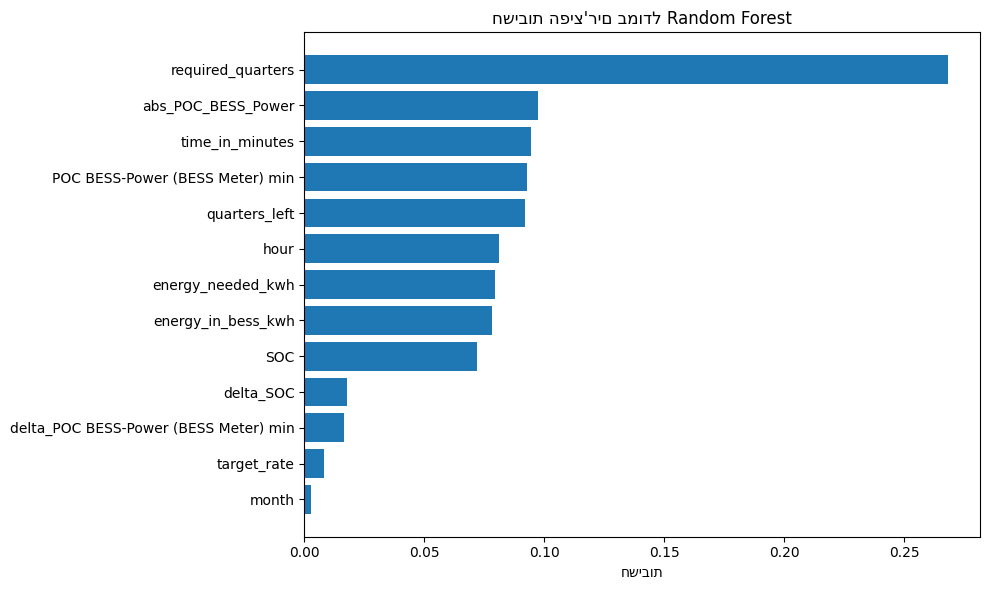

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# ◊ó◊ô◊©◊ï◊ë ◊ó◊©◊ô◊ë◊ï◊™ ◊î◊§◊ô◊¶'◊®◊ô◊ù
importances = model.feature_importances_

feat_imp = pd.DataFrame({
    'Feature': selected_features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# ◊î◊ì◊§◊°◊î
print(feat_imp)

# ◊í◊®◊£
plt.figure(figsize=(10, 6))
plt.barh(feat_imp['Feature'], feat_imp['Importance'])
plt.gca().invert_yaxis()
plt.xlabel("◊ó◊©◊ô◊ë◊ï◊™")
plt.title("◊ó◊©◊ô◊ë◊ï◊™ ◊î◊§◊ô◊¶'◊®◊ô◊ù ◊ë◊û◊ï◊ì◊ú Random Forest")
plt.tight_layout()
plt.show()

◊¢◊õ◊©◊ô◊ï ◊ê◊ó◊®◊ô ◊©◊®◊ê◊ô◊™◊ô ◊ê◊™ ◊ó◊©◊ô◊ë◊ï◊™ ◊î◊§◊ô◊¶◊®◊ô◊ù ◊ê◊†◊ô ◊®◊ï◊¶◊î ◊ú◊î◊ï◊®◊ô◊ì ◊õ◊û◊î ◊û◊î◊ù ◊ë◊û◊ô◊ï◊ó◊ì ◊ê◊™ ◊î◊ì◊ú◊™◊ê◊ï◊™ ◊ü◊ê◊™ furst_bess_act  ◊©◊ê◊†◊ô ◊ú◊ê ◊®◊ï◊¶◊î ◊©◊î◊ï◊ê ◊ô◊™◊ë◊°◊° ◊¢◊ú◊ô◊ï

                       Feature  Importance
3            required_quarters    0.375777
1                         hour    0.133156
4                quarters_left    0.125102
10          abs_POC_BESS_Power    0.124219
0                          SOC    0.075150
6           energy_in_bess_kwh    0.069965
5            energy_needed_kwh    0.063141
7     PV Meter-Exported Energy    0.010846
8   BESS Meter-Imported Energy    0.010356
9                           PR    0.009259
2                        month    0.003030


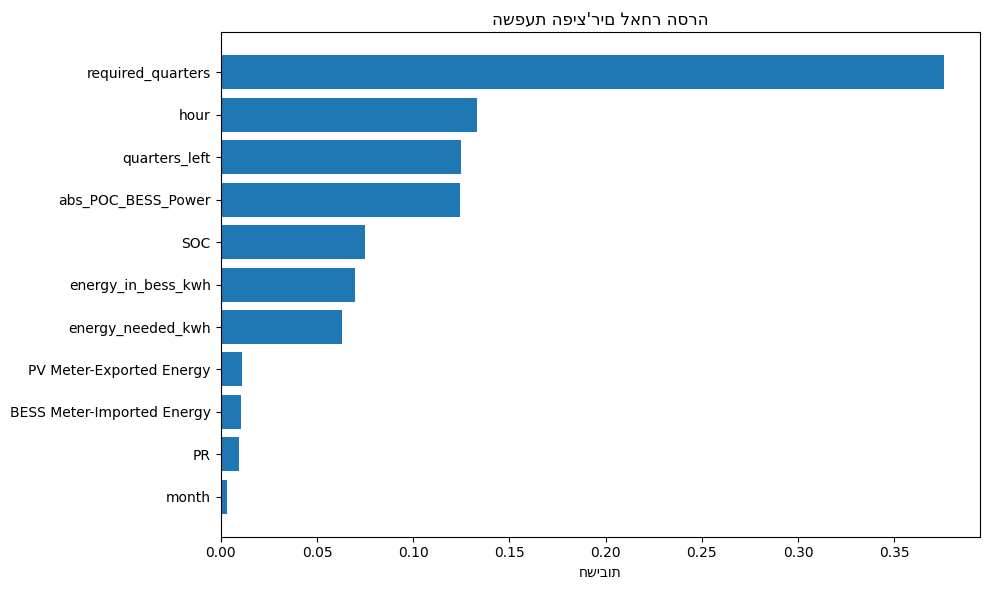


◊ì◊ô◊ï◊ß: 0.986
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       262
           1       0.99      0.98      0.99       324

    accuracy                           0.99       586
   macro avg       0.99      0.99      0.99       586
weighted avg       0.99      0.99      0.99       586



In [34]:
#selected_features = [
 #   'SOC', 'hour', 'month',
   # 'energy_needed_kwh', 'required_quarters','PV Meter-Exported Energy','delta_BESS Meter-Imported Energy',
   # 'quarters_left', 'time_in_minutes','BESS Meter-Imported Energy',
#]

selected_features = [
    'SOC', 'hour', 'month','required_quarters','quarters_left','energy_needed_kwh','energy_in_bess_kwh',
    'PV Meter-Exported Energy',
    'BESS Meter-Imported Energy','PR','abs_POC_BESS_Power'
]

df_filtered = df[(df['hour'] >= 9) & (df['hour'] < 16)].dropna(subset=['BESS First'])
X = df_filtered [selected_features]
y = df_filtered ['BESS First']  # ◊¢◊û◊ï◊ì◊™ ◊î◊ô◊¢◊ì ◊©◊ú◊ö (0 ◊ê◊ï 1, ◊ú◊ì◊ï◊í◊û◊î)

# 3. ◊ó◊ú◊ï◊ß◊î ◊ú◊ê◊ô◊û◊ï◊ü ◊ï◊ë◊ì◊ô◊ß◊î (◊ú◊ê ◊ó◊ï◊ë◊î ◊ê◊ù ◊õ◊ë◊® ◊î◊õ◊ú ◊û◊ï◊õ◊ü)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. ◊ê◊ô◊û◊ï◊ü ◊î◊û◊ï◊ì◊ú
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
importances = model.feature_importances_
feat_imp = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# ◊î◊ì◊§◊°◊î ◊ï◊í◊®◊£
print(feat_imp)

plt.figure(figsize=(10, 6))
plt.barh(feat_imp['Feature'], feat_imp['Importance'])
plt.gca().invert_yaxis()
plt.title("◊î◊©◊§◊¢◊™ ◊î◊§◊ô◊¶'◊®◊ô◊ù ◊ú◊ê◊ó◊® ◊î◊°◊®◊î")
plt.xlabel("◊ó◊©◊ô◊ë◊ï◊™")
plt.tight_layout()
plt.show()
# ◊™◊ó◊ñ◊ô◊™ ◊¢◊ú ◊°◊ò ◊î◊ë◊ì◊ô◊ß◊î
y_pred = model.predict(X_test)

# ◊ì◊ï◊ó ◊ë◊ô◊¶◊ï◊¢◊ô◊ù
from sklearn.metrics import classification_report, accuracy_score

print(f"\n◊ì◊ô◊ï◊ß: {accuracy_score(y_test, y_pred):.3f}")
print(classification_report(y_test, y_pred))

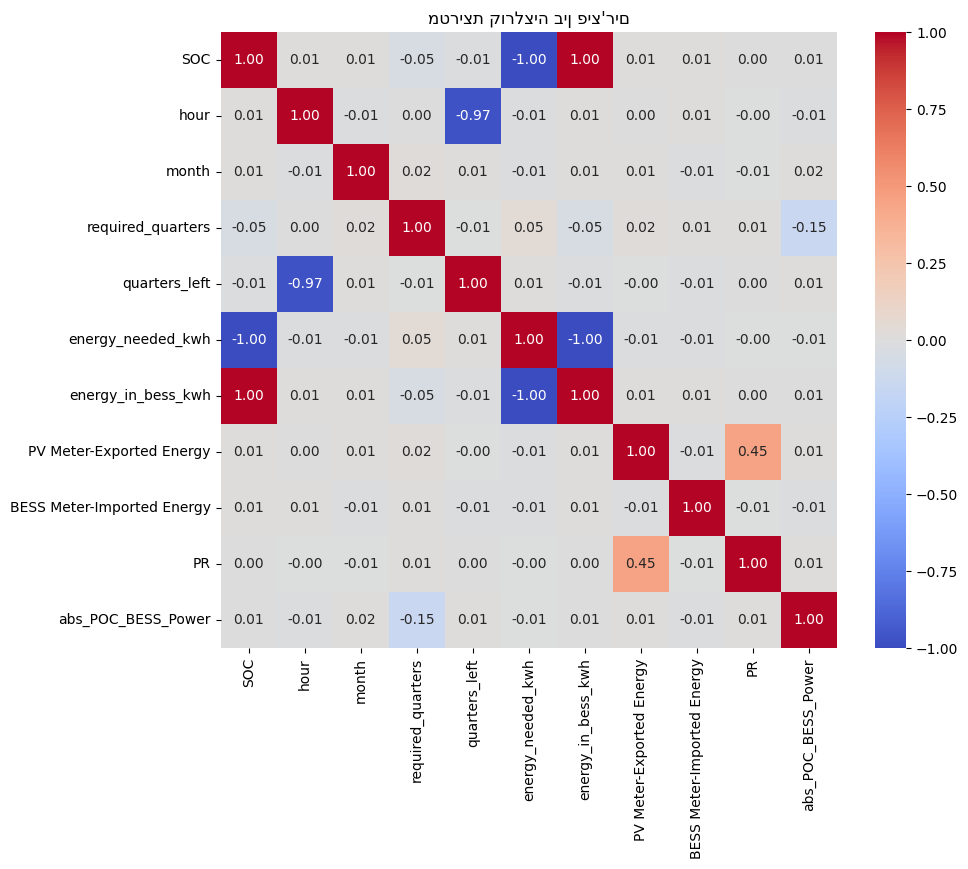

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df[selected_features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("◊û◊ò◊®◊ô◊¶◊™ ◊ß◊ï◊®◊ú◊¶◊ô◊î ◊ë◊ô◊ü ◊§◊ô◊¶'◊®◊ô◊ù")
plt.show()

              Feature  Importance
3   required_quarters    0.360314
6  abs_POC_BESS_Power    0.143940
4       quarters_left    0.143085
1                hour    0.121518
0                 SOC    0.119250
5   energy_needed_kwh    0.109057
2               month    0.002836


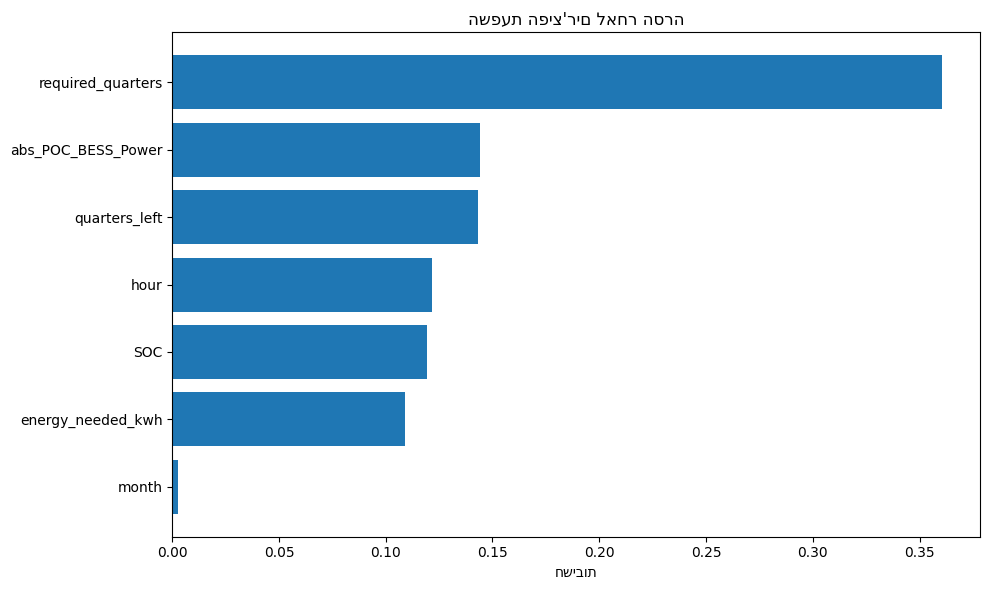


◊ì◊ô◊ï◊ß: 0.986
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       262
           1       1.00      0.98      0.99       324

    accuracy                           0.99       586
   macro avg       0.99      0.99      0.99       586
weighted avg       0.99      0.99      0.99       586



In [36]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

#X_train, X_test, y_train, y_test = train_test_split(
   # X[selected_features], y, test_size=0.2, stratify=y, random_state=42)



selected_features = [
    'SOC', 'hour', 'month','required_quarters','quarters_left','energy_needed_kwh'
    ,'abs_POC_BESS_Power'
]

df_filtered = df[(df['hour'] >= 9) & (df['hour'] < 16)].dropna(subset=['BESS First'])
X = df_filtered [selected_features]
y = df_filtered ['BESS First']  # ◊¢◊û◊ï◊ì◊™ ◊î◊ô◊¢◊ì ◊©◊ú◊ö (0 ◊ê◊ï 1, ◊ú◊ì◊ï◊í◊û◊î)

# 3. ◊ó◊ú◊ï◊ß◊î ◊ú◊ê◊ô◊û◊ï◊ü ◊ï◊ë◊ì◊ô◊ß◊î (◊ú◊ê ◊ó◊ï◊ë◊î ◊ê◊ù ◊õ◊ë◊® ◊î◊õ◊ú ◊û◊ï◊õ◊ü)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. ◊ê◊ô◊û◊ï◊ü ◊î◊û◊ï◊ì◊ú

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_leaf=2,
    max_leaf_nodes=50,
    random_state=42
)


#model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
importances = model.feature_importances_
feat_imp = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# ◊î◊ì◊§◊°◊î ◊ï◊í◊®◊£
print(feat_imp)

plt.figure(figsize=(10, 6))
plt.barh(feat_imp['Feature'], feat_imp['Importance'])
plt.gca().invert_yaxis()
plt.title("◊î◊©◊§◊¢◊™ ◊î◊§◊ô◊¶'◊®◊ô◊ù ◊ú◊ê◊ó◊® ◊î◊°◊®◊î")
plt.xlabel("◊ó◊©◊ô◊ë◊ï◊™")
plt.tight_layout()
plt.show()
# ◊™◊ó◊ñ◊ô◊™ ◊¢◊ú ◊°◊ò ◊î◊ë◊ì◊ô◊ß◊î
y_pred = model.predict(X_test)

# ◊ì◊ï◊ó ◊ë◊ô◊¶◊ï◊¢◊ô◊ù
from sklearn.metrics import classification_report, accuracy_score

print(f"\n◊ì◊ô◊ï◊ß: {accuracy_score(y_test, y_pred):.3f}")
print(classification_report(y_test, y_pred))

              Feature  Importance
3   required_quarters    0.347076
6  abs_POC_BESS_Power    0.151975
4       quarters_left    0.145870
1                hour    0.132985
0                 SOC    0.112505
5   energy_needed_kwh    0.106833
2               month    0.002757


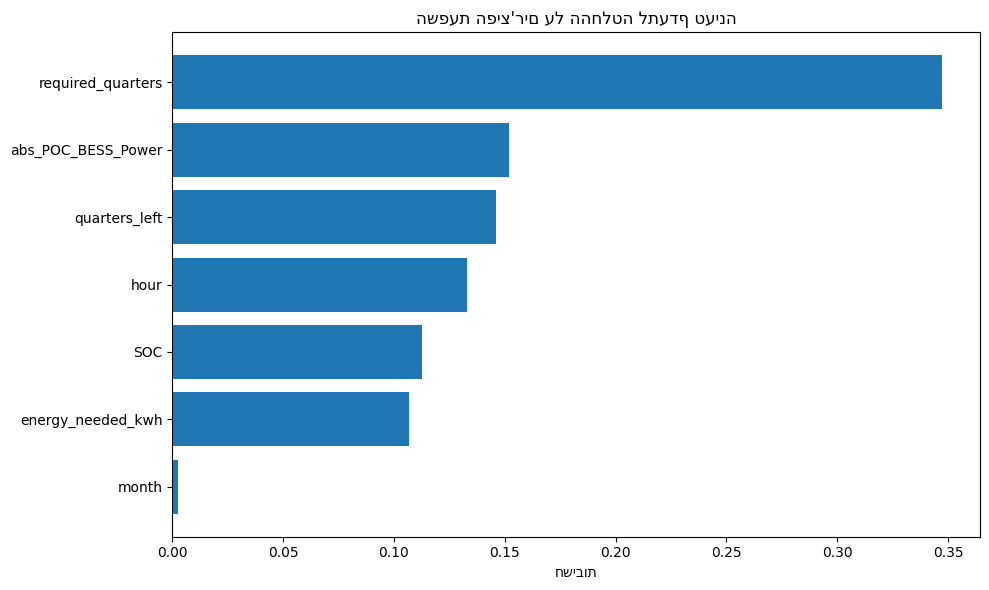


◊ì◊ô◊ï◊ß (Accuracy): 0.983
◊ì◊ï◊ó ◊°◊ô◊ï◊ï◊í:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       266
           1       0.98      0.98      0.98       320

    accuracy                           0.98       586
   macro avg       0.98      0.98      0.98       586
weighted avg       0.98      0.98      0.98       586



In [37]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import pandas as pd

# ---------------------------------------------------
# üéØ ◊î◊í◊ì◊®◊™ ◊î◊§◊ô◊¶'◊®◊ô◊ù ‚Äî ◊ë◊ú◊ô ◊ú◊õ◊ú◊ï◊ú ◊ê◊™ 'BESS First' ◊õ◊§◊ô◊¶'◊®!
# ---------------------------------------------------
selected_features = [
    'SOC', 'hour', 'month',
    'required_quarters',        # ◊†◊í◊ñ◊® ◊û◊™◊ï◊ö SOC ◊ï÷ægrid limit
    'quarters_left',            # ◊†◊í◊ñ◊® ◊û◊™◊ï◊ö ◊î◊©◊¢◊î
    'energy_needed_kwh',        # ◊†◊í◊ñ◊® ◊û◊™◊ï◊ö SOC
   # 'BESS Meter-Imported Energy', # ◊û◊ì◊ì ◊¶◊®◊ô◊õ◊î ◊û◊¶◊ò◊ë◊®◊™ (◊û◊î◊©◊ò◊ó)
    'abs_POC_BESS_Power'
]

df_filtered = df[(df['hour'] >= 9) & (df['hour'] < 16)].dropna(subset=['BESS First'])
X = df_filtered [selected_features]
y = df_filtered ['BESS First']   # ‚úÖ ◊û◊©◊™◊†◊î ◊û◊ò◊®◊î ‚Äì ◊†◊ï◊¶◊® ◊ú◊§◊ô ◊†◊ï◊°◊ó◊î: required > left

# ---------------------------------------------------
# üì§ ◊ó◊ú◊ï◊ß◊î ◊ú◊ê◊ô◊û◊ï◊ü ◊ï◊ë◊ì◊ô◊ß◊î (◊ê◊§◊©◊® ◊ú◊î◊ï◊°◊ô◊£ stratify)
# ---------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ---------------------------------------------------
# üå≤ ◊ê◊ô◊û◊ï◊ü ◊û◊ï◊ì◊ú ◊ô◊¢◊® ◊ê◊ß◊®◊ê◊ô
# ---------------------------------------------------
model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_leaf=2,
    max_leaf_nodes=50,
    random_state=42
)
model.fit(X_train, y_train)

# ---------------------------------------------------
# üìä ◊ó◊©◊ô◊ë◊ï◊™ ◊î◊§◊ô◊¶'◊®◊ô◊ù
# ---------------------------------------------------
importances = model.feature_importances_
feat_imp = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feat_imp)

plt.figure(figsize=(10, 6))
plt.barh(feat_imp['Feature'], feat_imp['Importance'])
plt.gca().invert_yaxis()
plt.title("◊î◊©◊§◊¢◊™ ◊î◊§◊ô◊¶'◊®◊ô◊ù ◊¢◊ú ◊î◊î◊ó◊ú◊ò◊î ◊ú◊™◊¢◊ì◊£ ◊ò◊¢◊ô◊†◊î")
plt.xlabel("◊ó◊©◊ô◊ë◊ï◊™")
plt.tight_layout()
plt.show()

# ---------------------------------------------------
# üéØ ◊™◊ó◊ñ◊ô◊™ ◊ï◊ë◊ì◊ô◊ß◊™ ◊ì◊ô◊ï◊ß
# ---------------------------------------------------
y_pred = model.predict(X_test)

print(f"\n◊ì◊ô◊ï◊ß (Accuracy): {accuracy_score(y_test, y_pred):.3f}")
print("◊ì◊ï◊ó ◊°◊ô◊ï◊ï◊í:")
print(classification_report(y_test, y_pred))


In [38]:
print(f"len(y_test): {len(y_test)}")
print(f"len(y_pred): {len(y_pred)}")

print("◊î◊ê◊ù ◊ô◊© ◊©◊ï◊†◊ô ◊ë◊ô◊ü y_test ◊ú÷æy_pred?")
print((y_test != y_pred).sum())

len(y_test): 586
len(y_pred): 586
◊î◊ê◊ù ◊ô◊© ◊©◊ï◊†◊ô ◊ë◊ô◊ü y_test ◊ú÷æy_pred?
10


In [39]:
import joblib
joblib.dump(model, 'bess_priority_model2.pkl')

['bess_priority_model2.pkl']

In [40]:
import numpy as np
import pandas as pd
import joblib

# ◊®◊©◊ô◊û◊™ ◊î◊§◊ô◊¶'◊®◊ô◊ù (◊ó◊ô◊ô◊ë◊™ ◊ú◊î◊™◊ê◊ô◊ù ◊ú◊°◊ì◊® ◊©◊ë◊ï ◊î◊û◊ï◊ì◊ú ◊ê◊ï◊û◊ü!)
selected_features = [
    'SOC',
    'hour',
    'month',
    'energy_needed_kwh',
    'required_quarters',
    'quarters_left',
    'abs_POC_BESS_Power',
    #'BESS Meter-Imported Energy',
    #'BESS First'  # ‚Üê ◊õ◊ê◊ü ◊û◊ï◊°◊ô◊§◊ô◊ù ◊ê◊ï◊™◊ï
]

# ◊†◊™◊ï◊†◊ô ◊ê◊™◊® ◊ß◊ë◊ï◊¢◊ô◊ù
site_capacity_kwp = 15200
grid_connection_limit_kw = 6000
bess_capacity_kwh = 0.99 * 35000  # SOC ◊ô◊¢◊ì
bess_charge_limit_kw = 6000

# ◊§◊ï◊†◊ß◊¶◊ô◊ô◊™ ◊ë◊†◊ô◊ô◊™ ◊§◊ô◊¶'◊®◊ô◊ù
def prepare_features(input_dict):
    soc = input_dict['soc']
    hour = input_dict['hour']
    month = input_dict['month']
   # bess_imported = input_dict['BESS Meter-Imported Energy']



    BESS_Power = input_dict.get('abs_POC_BESS_Power', 0)
    if BESS_Power == 0:
        BESS_Power = 1

    energy_needed_kwh = bess_capacity_kwh * (1 - soc / 100)
    #required_quarters = np.ceil((energy_needed_kwh / grid_connection_limit_kw) * 4)
    required_quarters = np.ceil((energy_needed_kwh / BESS_Power) * 4)
    quarters_left = max(0, (16 - hour) * 4)

    bess_first = int(required_quarters > quarters_left)

    input_dict_full = {
        'SOC': soc,
        'hour': hour,
        'month': month,
        'energy_needed_kwh': energy_needed_kwh,
        'required_quarters': required_quarters,
        'quarters_left': quarters_left,
        'abs_POC_BESS_Power':BESS_Power,
   #    'BESS Meter-Imported Energy': bess_imported,
        'BESS First': bess_first# ‚Üê ‚ú® ◊î◊§◊ô◊¶'◊® ◊î◊ß◊®◊ô◊ò◊ô
    }

    features = {key: input_dict_full[key] for key in selected_features}
    return pd.DataFrame([features])

    # ◊ô◊¶◊ô◊®◊™ DataFrame ◊ë◊°◊ì◊® ◊¢◊û◊ï◊ì◊ï◊™ ◊û◊ì◊ï◊ô◊ß ◊õ◊§◊ô ◊©◊î◊û◊ï◊ì◊ú ◊ê◊ï◊û◊ü ◊¢◊ú◊ô◊ï
    return pd.DataFrame([input_dict_full])[selected_features]

# ◊ò◊¢◊ô◊†◊™ ◊î◊û◊ï◊ì◊ú ◊î◊û◊ê◊ï◊û◊ü
model = joblib.load("bess_priority_model2.pkl")
selected_features = list(model.feature_names_in_)

# ◊°◊ï◊õ◊ü ◊©◊û◊ß◊ë◊ú ◊î◊ó◊ú◊ò◊î

def decide_bess_priority(input_dict):
    features_df = prepare_features(input_dict)

    # ◊©◊û◊ï◊™ ◊©◊î◊û◊ï◊ì◊ú ◊û◊¶◊§◊î ◊ú◊î◊ù
    expected_features = list(model.feature_names_in_)
    # ◊©◊û◊ï◊™ ◊©◊î◊í◊ô◊¢◊ï ◊ë◊§◊ï◊¢◊ú
    actual_features = list(features_df.columns)

    # ◊ë◊ì◊ô◊ß◊î ◊ê◊ù ◊ô◊© ◊ó◊ï◊°◊® ◊ê◊ï ◊¢◊ï◊ì◊§◊ô◊ù
    missing = [f for f in expected_features if f not in actual_features]
    extra = [f for f in actual_features if f not in expected_features]
    order_wrong = expected_features != actual_features

    # ◊î◊ì◊§◊°◊™ ◊§◊¢◊®◊ô◊ù
    if missing:
        print("‚ùå ◊§◊ô◊¶'◊®◊ô◊ù ◊ó◊°◊®◊ô◊ù ◊ë◊ì◊ê◊ò◊î:", missing)
    if extra:
        print("‚ö†Ô∏è ◊§◊ô◊¶'◊®◊ô◊ù ◊û◊ô◊ï◊™◊®◊ô◊ù ◊ë◊ì◊ê◊ò◊î:", extra)
    if order_wrong and not missing and not extra:
        print("‚ö†Ô∏è ◊°◊ì◊® ◊î◊§◊ô◊¶'◊®◊ô◊ù ◊©◊ï◊†◊î ◊û◊û◊î ◊©◊î◊û◊ï◊ì◊ú ◊¶◊ô◊§◊î ◊ú◊ï.")
        print("◊û◊¶◊ï◊§◊î:", expected_features)
        print("◊ê◊ë◊ú ◊ë◊§◊ï◊¢◊ú:", actual_features)

    if missing or extra or order_wrong:
        print("‚õî ◊ú◊ê ◊†◊ë◊¶◊¢ ◊™◊ó◊ñ◊ô◊™ ◊¢◊ì ◊©◊î◊§◊¢◊® ◊ô◊™◊ï◊ß◊ü.")
        return "◊©◊í◊ô◊ê◊î: ◊†◊™◊ï◊†◊ô ◊ß◊ú◊ò ◊ú◊ê ◊™◊ï◊ê◊û◊ô◊ù ◊ú◊û◊ï◊ì◊ú"

    # ◊ê◊ù ◊î◊õ◊ï◊ú ◊™◊ß◊ô◊ü ‚Äì ◊†◊ë◊¶◊¢ ◊™◊ó◊ñ◊ô◊™
    prediction = model.predict(features_df)[0]
    return "‚úÖ ◊ò◊¢◊ô◊†◊™ BESS ◊ë◊¢◊ì◊ô◊§◊ï◊™" if prediction == 1 else "üü° ◊ê◊ô◊ü ◊¶◊ï◊®◊ö ◊ë◊¢◊ì◊ô◊§◊ï◊™ ◊ú÷æBESS"

# ◊ì◊ï◊í◊û◊î ◊ú◊©◊ô◊û◊ï◊©
sample_input = {
    'soc': 1,
    'hour': 12,
    'month': 4,
    'BESS_Power': 5000,
}

# ◊î◊ì◊§◊°◊™ ◊î◊î◊ó◊ú◊ò◊î
print(decide_bess_priority(sample_input))

‚úÖ ◊ò◊¢◊ô◊†◊™ BESS ◊ë◊¢◊ì◊ô◊§◊ï◊™


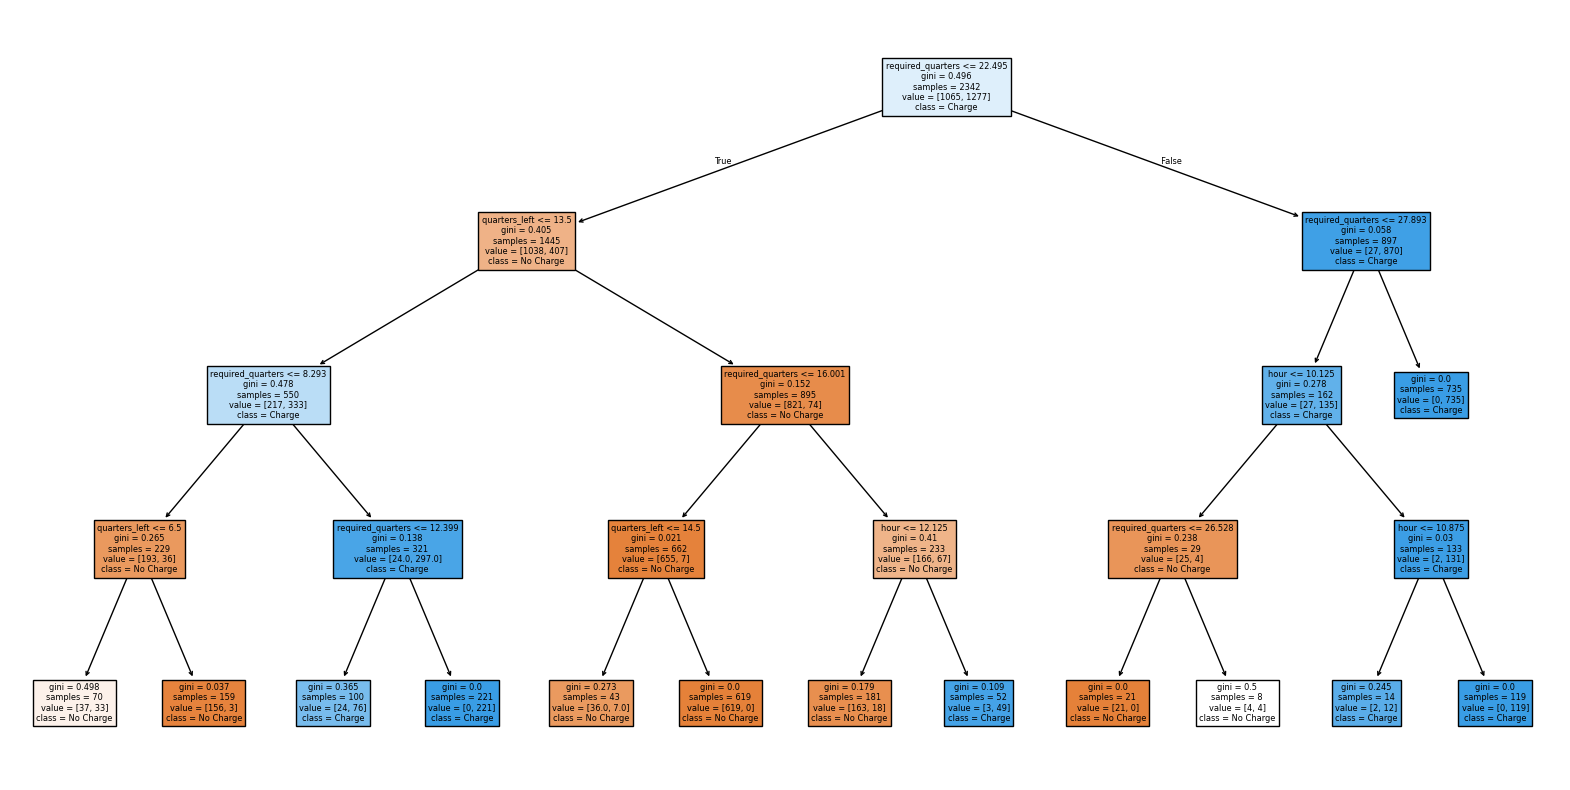

In [41]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# ◊ê◊ô◊û◊ï◊ü ◊¢◊• ◊î◊ó◊ú◊ò◊î ◊§◊©◊ï◊ò
dt_model = DecisionTreeClassifier(max_depth=4, random_state=42)
dt_model.fit(X_train, y_train)

# ◊¶◊ô◊ï◊® ◊î◊¢◊•
plt.figure(figsize=(20,10))
plot_tree(dt_model, feature_names=X.columns, class_names=['No Charge', 'Charge'], filled=True)
plt.show()

In [42]:
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(
    dt_model, out_file=None,
    feature_names=X.columns,
    class_names=['No Charge', 'Charge'],
    filled=True, rounded=True,
    special_characters=True
)
graph = graphviz.Source(dot_data)
graph.render("decision_tree")  # ◊ô◊ô◊¶◊ï◊® ◊ß◊ï◊ë◊•

'decision_tree.pdf'

In [43]:
def interactive_decision(soc, hour, month, BESS_Power):
    input_dict = {
        'soc': soc,
        'hour': hour,
        'month': month,
        #'BESS Meter-Imported Energy': bess_imported
        'abs_POC_BESS_Power':BESS_Power
    }

    features_df = prepare_features(input_dict)
    prediction = model.predict(features_df)[0]

    print("üìä ◊§◊ô◊¶'◊®◊ô◊ù ◊©◊ó◊ï◊©◊ë◊ï ◊ú◊û◊ï◊ì◊ú:")
    display(features_df)

    print(f"üîç ◊™◊ï◊¶◊ê◊™ ◊î◊û◊ï◊ì◊ú (raw): {prediction}")

    if prediction == 1:
        result = "‚úÖ ◊ò◊¢◊ô◊†◊™ BESS ◊ë◊¢◊ì◊ô◊§◊ï◊™"
    elif prediction == 0:
        result = "üü° ◊ê◊ô◊ü ◊¶◊ï◊®◊ö ◊ë◊¢◊ì◊ô◊§◊ï◊™ ◊ú÷æBESS"
    else:
        result = "‚ö†Ô∏è ◊©◊í◊ô◊ê◊î: ◊™◊ó◊ñ◊ô◊™ ◊ú◊ê ◊¶◊§◊ï◊ô◊î ◊û◊î◊û◊ï◊ì◊ú"

    print("üîç ◊™◊ï◊¶◊ê◊î:", result)

In [44]:
from ipywidgets import interact, IntSlider
interact(
    interactive_decision,
    soc=IntSlider(min=0, max=100, value=75),
    hour=IntSlider(min=9, max=16, value=12),
    month=IntSlider(min=1, max=12, value=4),
    BESS_Power=IntSlider(min=0, max=6000, value=5000)
)

interactive(children=(IntSlider(value=75, description='soc'), IntSlider(value=12, description='hour', max=16, ‚Ä¶

<function __main__.interactive_decision(soc, hour, month, BESS_Power)>